In [11]:
# Bibliotecas gerais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão de dados e pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Modelos de aprendizado de máquina
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Métricas de avaliação
from sklearn.metrics import accuracy_score, classification_report

# Visualização adicional para árvores de decisão
import graphviz


In [12]:
df = pd.read_csv("../data/breast-cancer-wisconsin-data_data.csv")

# Traduzir os nomes das colunas para português
colunas_traduzidas = {
    "id": "id",
    "diagnosis": "diagnóstico",
    "radius_mean": "raio_médio",
    "texture_mean": "textura_média",
    "perimeter_mean": "perímetro_médio",
    "area_mean": "área_média",
    "smoothness_mean": "suavidade_média",
    "compactness_mean": "compactação_média",
    "concavity_mean": "concavidade_média",
    "concave points_mean": "pontos_concavos_médios",
    "symmetry_mean": "simetria_média",
    "fractal_dimension_mean": "dimensão_fractal_média",
    "radius_se": "raio_se",
    "texture_se": "textura_se",
    "perimeter_se": "perímetro_se",
    "area_se": "área_se",
    "smoothness_se": "suavidade_se",
    "compactness_se": "compactação_se",
    "concavity_se": "concavidade_se",
    "concave points_se": "pontos_concavos_se",
    "symmetry_se": "simetria_se",
    "fractal_dimension_se": "dimensão_fractal_se",
    "radius_worst": "raio_pior",
    "texture_worst": "textura_pior",
    "perimeter_worst": "perímetro_pior",
    "area_worst": "área_pior",
    "smoothness_worst": "suavidade_pior",
    "compactness_worst": "compactação_pior",
    "concavity_worst": "concavidade_pior",
    "concave points_worst": "pontos_concavos_piores",
    "symmetry_worst": "simetria_pior",
    "fractal_dimension_worst": "dimensão_fractal_pior"
}

df = df.rename(columns=colunas_traduzidas)

In [13]:
# Remover colunas desnecessárias e lidar com valores nulos
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Converter a coluna 'diagnóstico' para numérico (M = 1, B = 0)
df['diagnóstico'] = df['diagnóstico'].map({'M': 1, 'B': 0})


In [14]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Ordenar as variáveis pela correlação com 'diagnóstico'
correlation_with_target = correlation_matrix['diagnóstico'].abs().sort_values(ascending=False)
print("Correlação com o diagnóstico:")
print(correlation_with_target)

# Selecionar as 10 variáveis mais correlacionadas
top_features = correlation_with_target.index[1:11]  # Ignorar o próprio 'diagnóstico'


Correlação com o diagnóstico:
diagnóstico               1.000000
pontos_concavos_piores    0.793566
perímetro_pior            0.782914
pontos_concavos_médios    0.776614
raio_pior                 0.776454
perímetro_médio           0.742636
área_pior                 0.733825
raio_médio                0.730029
área_média                0.708984
concavidade_média         0.696360
concavidade_pior          0.659610
compactação_média         0.596534
compactação_pior          0.590998
raio_se                   0.567134
perímetro_se              0.556141
área_se                   0.548236
textura_pior              0.456903
suavidade_pior            0.421465
simetria_pior             0.416294
textura_média             0.415185
pontos_concavos_se        0.408042
suavidade_média           0.358560
simetria_média            0.330499
dimensão_fractal_pior     0.323872
compactação_se            0.292999
concavidade_se            0.253730
dimensão_fractal_se       0.077972
suavidade_se             

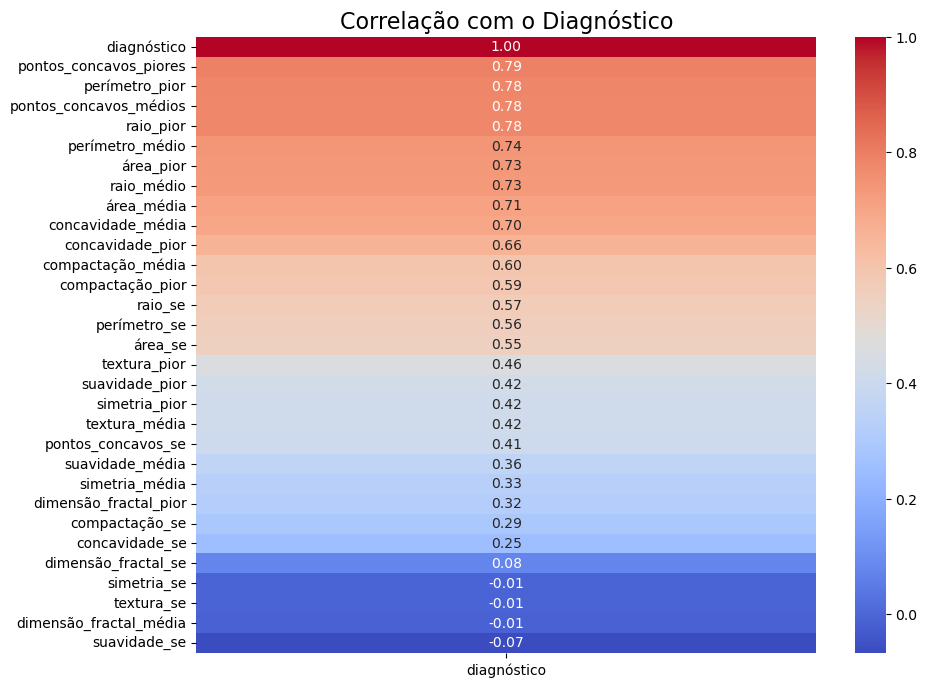

In [15]:
# Mapa de Calor da Matriz de Correlação

plt.figure(figsize=(10, 8))

# Alvo ('diagnóstico')
sns.heatmap(correlation_matrix[['diagnóstico']].sort_values(by='diagnóstico', ascending=False),
            annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title('Correlação com o Diagnóstico', fontsize=16)

plt.show()

Acurácia: 0.94


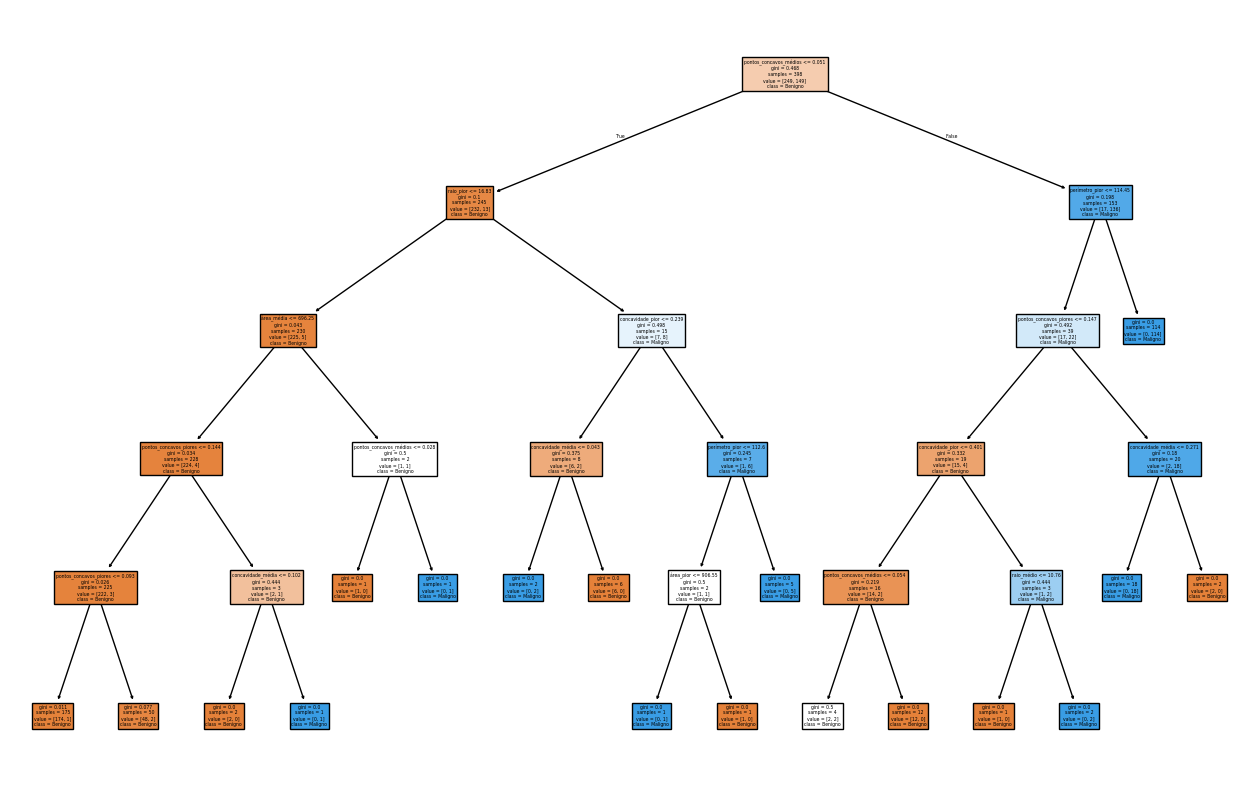

In [16]:
X = df[top_features]
y = df['diagnóstico']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar a árvore de decisão
clf = DecisionTreeClassifier(random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=top_features, class_names=['Benigno', 'Maligno'], filled=True)
plt.show()

In [17]:
# Gerar arquivo .pdf da árvore de decisão

print("\nVisualização Interativa da Árvore de Decisão:")
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=top_features.tolist(),
                           class_names=['Benigno', 'Maligno'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("arvore_decisao", view=True)  # Gera o arquivo e exibe


Visualização Interativa da Árvore de Decisão:


'arvore_decisao.pdf'

Opening in existing browser session.


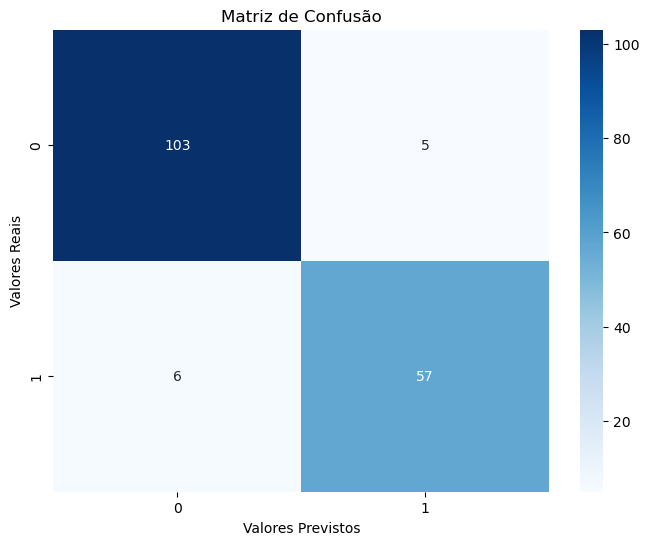


Total de Acertos: 160
Total de Erros: 11

Acurácia: 0.94


In [18]:
# Passo 1: Realizar previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Passo 2: Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Passo 3: Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_confusao,
    annot=True,           
    fmt='d',             
    cmap='Blues',            
    xticklabels=set(y_test),  
    yticklabels=set(y_test)   
)
plt.title("Matriz de Confusão")
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()

# Passo 4: Calcular a quantidade de acertos e erros
acertos = sum(y_test.values == y_pred)  
erros = len(y_test) - acertos           
print(f"\nTotal de Acertos: {acertos}")
print(f"Total de Erros: {erros}")

# Passo 5: Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {accuracy:.2f}")


In [19]:
# Tratar respostas inválidas
def obter_resposta(pergunta):
    while True:
        resposta = input(pergunta).strip().lower()
        if resposta in ['sim', 'não']:
            return 1 if resposta == 'sim' else 0
        else:
            print("\nResposta inválida. Por favor, digite 'sim' ou 'não'.\n")


In [21]:
def diagnosticar_arvore_decisao(modelo, feature_names):
    
    # Nó inicial da árvore
    no_atual = 0

    while True:
        # Obter a característica usada para divisão neste nó
        nome_feature = feature_names[modelo.tree_.feature[no_atual]]
        limiar = modelo.tree_.threshold[no_atual]

        # Verificar se é um nó folha
        if modelo.tree_.feature[no_atual] == -2:  # Nó folha não tem divisão
            classe = modelo.classes_[modelo.tree_.value[no_atual].argmax()]
            if classe == 1:
                return "Maligno", "Consulte um especialista."
            else:
                return "Benigno", "Monitore regularmente."

        resposta = obter_resposta(f"A característica '{nome_feature}' é maior que {limiar:.2f}? (sim/não): ")

        if resposta == 1:  # Sim
            no_atual = modelo.tree_.children_right[no_atual]
        else:  # Não
            no_atual = modelo.tree_.children_left[no_atual]

diagnostico = diagnosticar_arvore_decisao(clf, top_features)
print(f"Diagnóstico: {diagnostico}")


Diagnóstico: ('Benigno', 'Monitore regularmente.')


In [55]:


def executar_knn(df, k=5, test_size=0.2, random_state=42):

    X = df.drop(columns=['diagnóstico'])
    y = df['diagnóstico']

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Escalar os dados (padronização)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Criar e treinar o modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    acuracia = accuracy_score(y_test, y_pred)

    relatorio = classification_report(y_test, y_pred, target_names=["0", "1"])

    return {"acuracia": acuracia, "relatorio": relatorio}

resultado = executar_knn(df)
print(f"Acurácia do modelo KNN: {resultado['acuracia']:.2f}\n")
print("Relatório de classificação:")
print(resultado['relatorio'])


Acurácia do modelo KNN: 0.95

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [54]:

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar PCA para reduzir a dimensionalidade 
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinar o modelo SVM
svm = SVC(kernel='linear') 
svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo SVM: 0.94

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

